# PROYECTO FINAL - ANÁLISIS DE DATOS MASIVOS 2025


En este notebook vamos a:

1. **Cargar** y limpiar el dataset vía `/load_dataset`.

2. **Explorar** distribuciones y series temporales con `/graficar`.

3. **Clasificar** la gravedad con `/train_model` y `/evaluate_model`.

4. **Agrupar** condiciones meteorológicas con `/train_model` y `/evaluate_model`.


El servidor se ejecuta con: python server/server_V2.py

In [1]:
#--------------------------------- IMPORTACIONES
#-----------------------------------------------
import requests
import pandas as pd
from IPython.display import display, Markdown

API = "http://localhost:5000"  # URL/puerto del servidor

In [2]:
#--------------- CARGA DE DATOS y LIMPIEZA
PATH = "datasets/US_Accidents_March23.csv"

# al cargar el dataset la api ya hace la limpieza por defecto
r = requests.post(f"{API}/load_dataset", json={"path": PATH})
r.raise_for_status()
info = r.json()

In [3]:
# En la respuesta obtenemos info como el log de limpieza o tipos de datos
df_preview = pd.DataFrame(info["preview"])
dtypes = pd.Series(info["dtypes"], name="dtype").sort_index()
display(Markdown("**Tipos de dato detectados:**"))
display(dtypes.to_frame())
print("Tipos detectados:", info["dtypes"])

log = info.get("cleaning_log", [])
display(Markdown("**Log de limpieza aplicado:**"))
for entry in log:
    display(Markdown(f"- {entry}"))


**Tipos de dato detectados:**

,dtype
Airport_Code,object
Amenity,bool
Astronomical_Twilight,object
Bump,bool
City,object
Civil_Twilight,object
County,object
Crossing,bool
Description,object
Distance(mi),float64


Tipos detectados: {'Airport_Code': 'object', 'Amenity': 'bool', 'Astronomical_Twilight': 'object', 'Bump': 'bool', 'City': 'object', 'Civil_Twilight': 'object', 'County': 'object', 'Crossing': 'bool', 'Description': 'object', 'Distance(mi)': 'float64', 'End_Lat': 'float64', 'End_Lng': 'float64', 'End_Time': 'datetime64[ns]', 'Give_Way': 'bool', 'Hour': 'float64', 'Humidity(%)': 'float64', 'ID': 'object', 'Junction': 'bool', 'Month': 'float64', 'Nautical_Twilight': 'object', 'No_Exit': 'bool', 'Precipitation(in)': 'float64', 'Pressure(in)': 'float64', 'Railway': 'bool', 'Roundabout': 'bool', 'Severity': 'int64', 'Source': 'object', 'Start_Lat': 'float64', 'Start_Lng': 'float64', 'Start_Time': 'datetime64[ns]', 'State': 'object', 'Station': 'bool', 'Stop': 'bool', 'Street': 'object', 'Sunrise_Sunset': 'object', 'Temperature(F)': 'float64', 'Timezone': 'datetime64[ns]', 'Traffic_Calming': 'bool', 'Traffic_Signal': 'bool', 'Visibility(mi)': 'float64', 'Weather_Condition': 'object', 'Weathe

**Log de limpieza aplicado:**

- Eliminadas 2 columnas vacías o constantes.

- 'End_Lat' imputada con media.

- 'End_Lng' imputada con media.

- 'Description' imputada con 'Desconocido'.

- 'Street' imputada con 'Desconocido'.

- 'City' imputada con 'Desconocido'.

- 'Zipcode' imputada con 'Desconocido'.

- 'Timezone' imputada con 'Desconocido'.

- 'Airport_Code' imputada con 'Desconocido'.

- 'Weather_Timestamp' imputada con 'Desconocido'.

- 'Temperature(F)' imputada con media.

- 'Wind_Chill(F)' imputada con media.

- 'Humidity(%)' imputada con media.

- 'Pressure(in)' imputada con media.

- 'Visibility(mi)' imputada con media.

- 'Wind_Direction' imputada con 'Desconocido'.

- 'Wind_Speed(mph)' imputada con media.

- 'Precipitation(in)' imputada con media.

- 'Weather_Condition' imputada con 'Desconocido'.

- 'Sunrise_Sunset' imputada con 'Desconocido'.

- 'Civil_Twilight' imputada con 'Desconocido'.

- 'Nautical_Twilight' imputada con 'Desconocido'.

- 'Astronomical_Twilight' imputada con 'Desconocido'.

In [4]:
# helper para mostrar gráficos desde la API
from IPython.display import Image, display

def plot_from_api(payload):
    r = requests.post(f"{API}/graficar", json=payload)
    try:
        r.raise_for_status()
    except Exception:
        # imprimimos el cuerpo de la respuesta para ver el error
        print("Error del servidor:", r.status_code, r.text)
        raise
    display(Image(data=r.content))


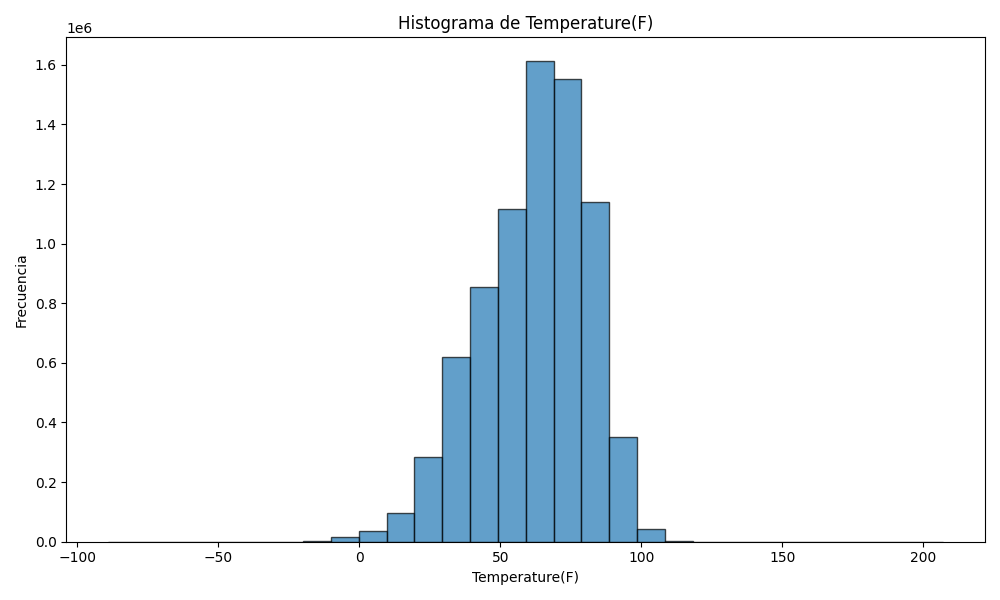

In [5]:
# Histograma de Temperature(F)
plot_from_api({
    "tipo": "Histograma",
    "columna_y": "Temperature(F)"
})

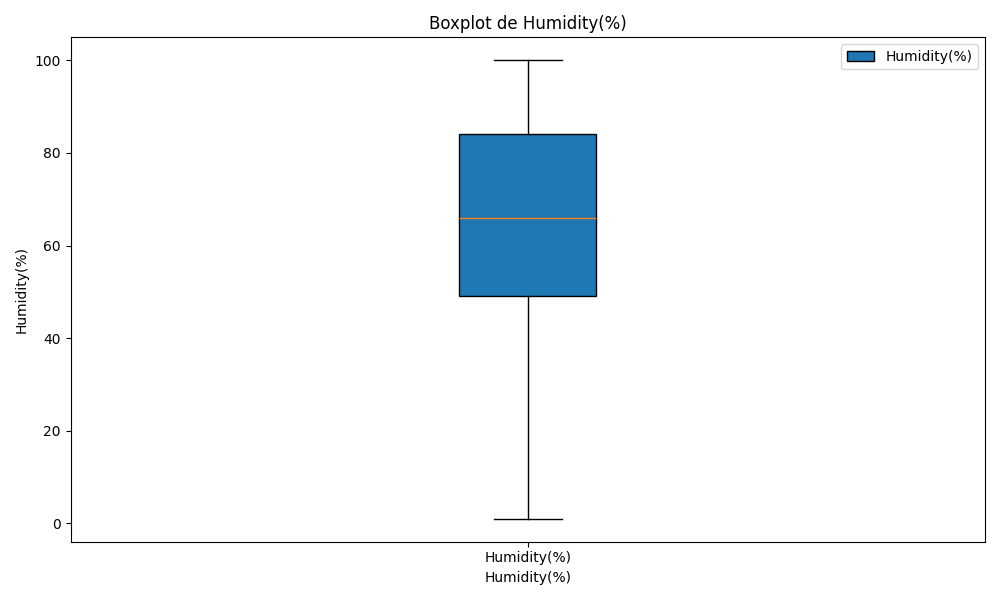

In [6]:
# Boxplot de Humidity(%)
plot_from_api({
    "tipo": "Boxplot",
    "columna_y": "Humidity(%)"
})

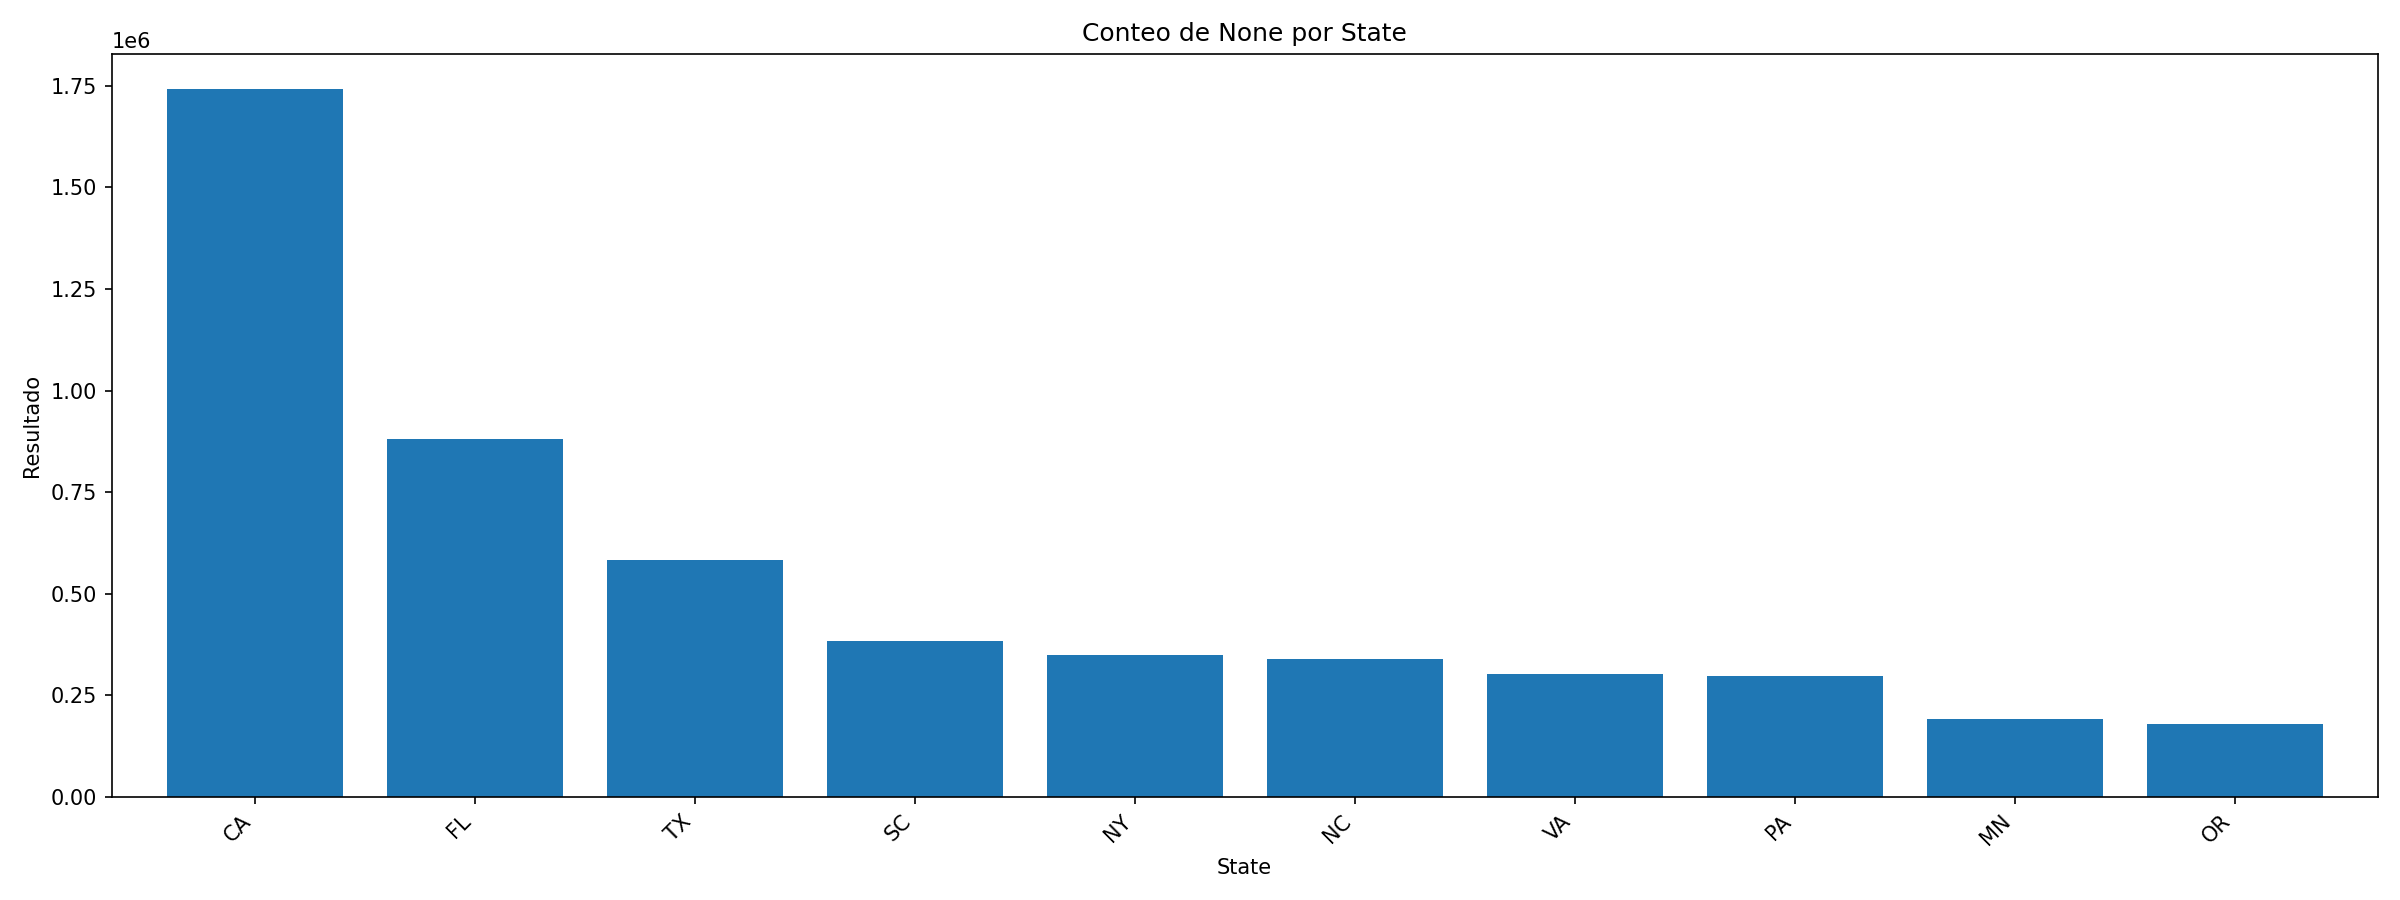

In [7]:
# Distribución de accidentes por State (Top 10)
plot_from_api({
    "tipo": "Barra",
    "columna_x": "State",
    "agregacion": "Conteo",
    "agrupacion_fecha": "Ninguna"
})


 - El histograma de temperatura nos muestra qué rangos de temperatura son más frecuentes en los datos.  

 - El boxplot de humedad revela posibles outliers y la mediana de humedad en los accidentes.  

 - El gráfico de barras de **State** nos ayuda a ver en qué estados se han registrado más accidentes.

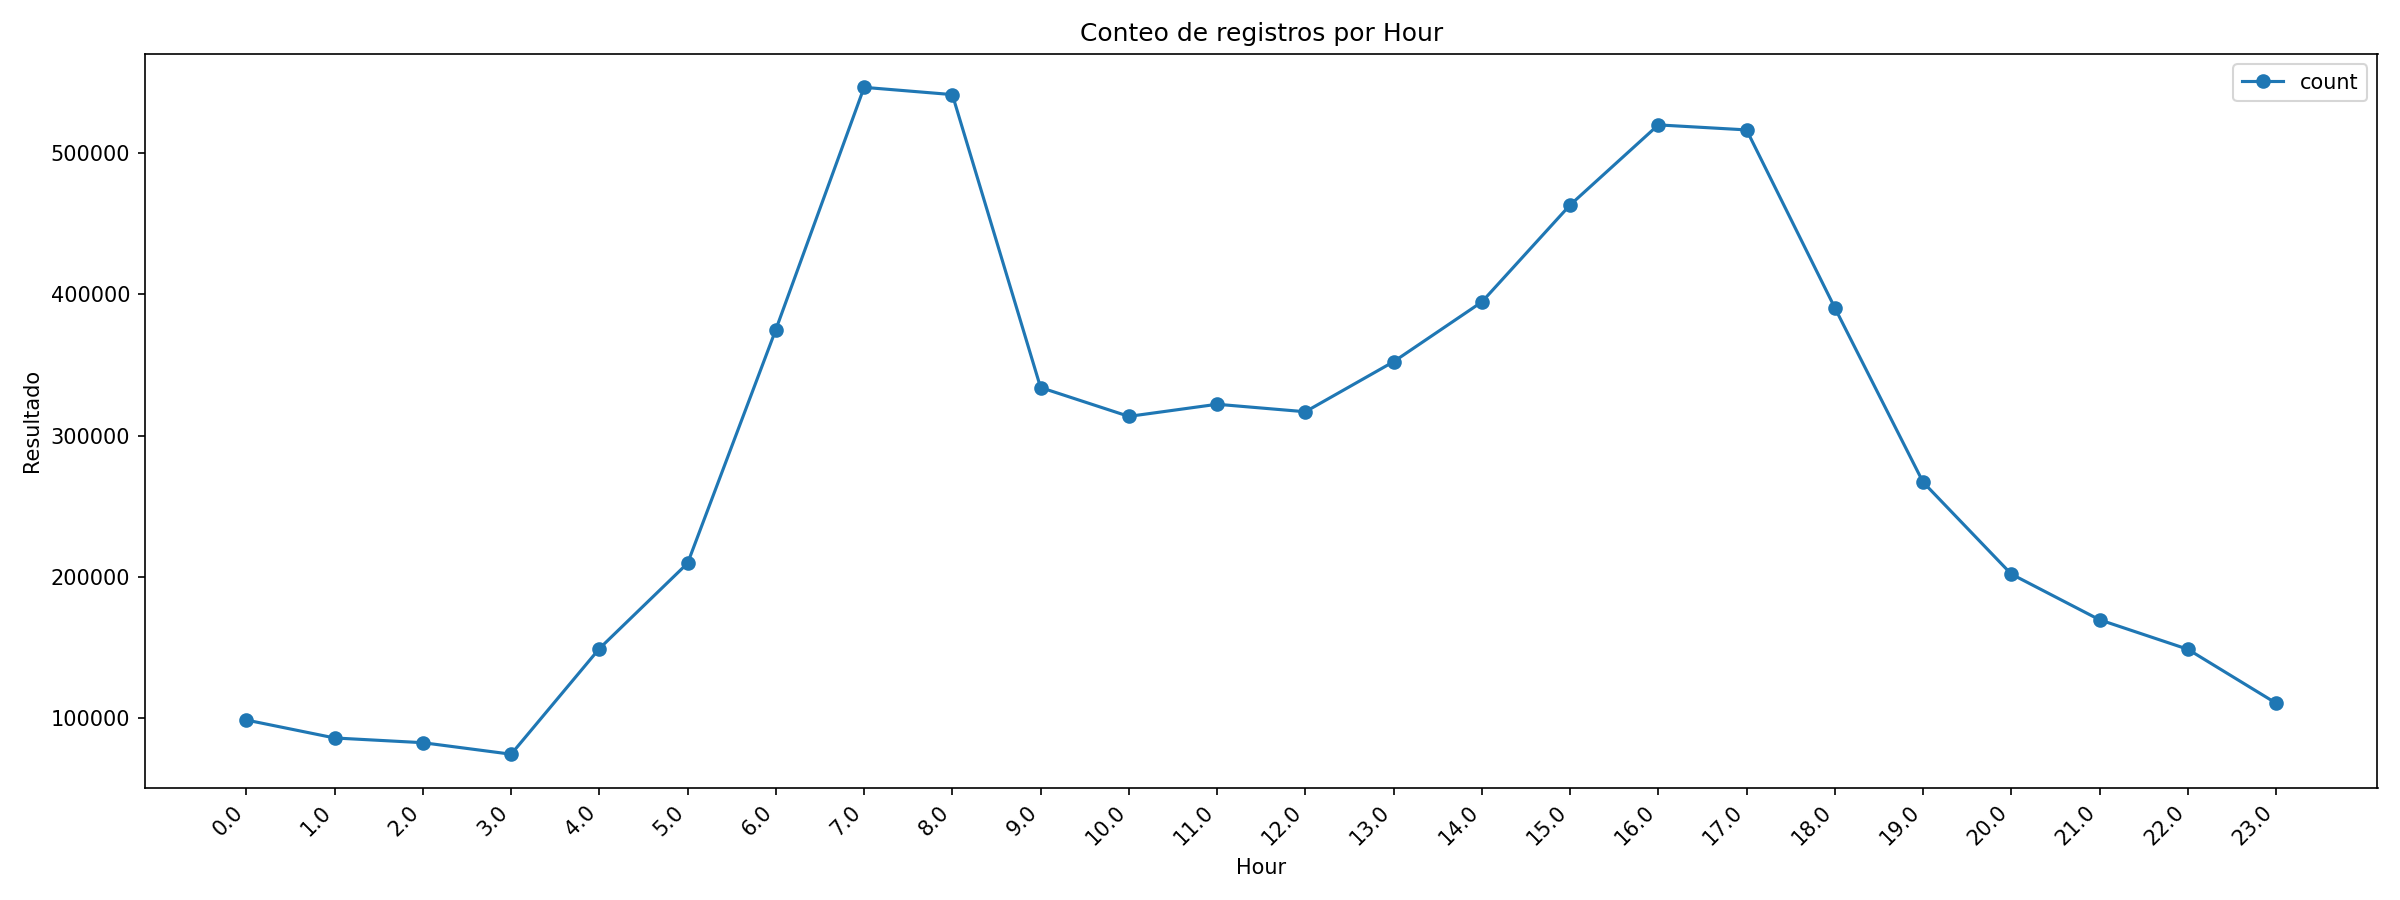

In [8]:
# Serie temporal de accidentes por hora del día
plot_from_api({
    "tipo": "Línea",
    "columna_x": "Hour",
    "agrupacion_fecha": "Ninguna",
    "agregacion": "Conteo"
})


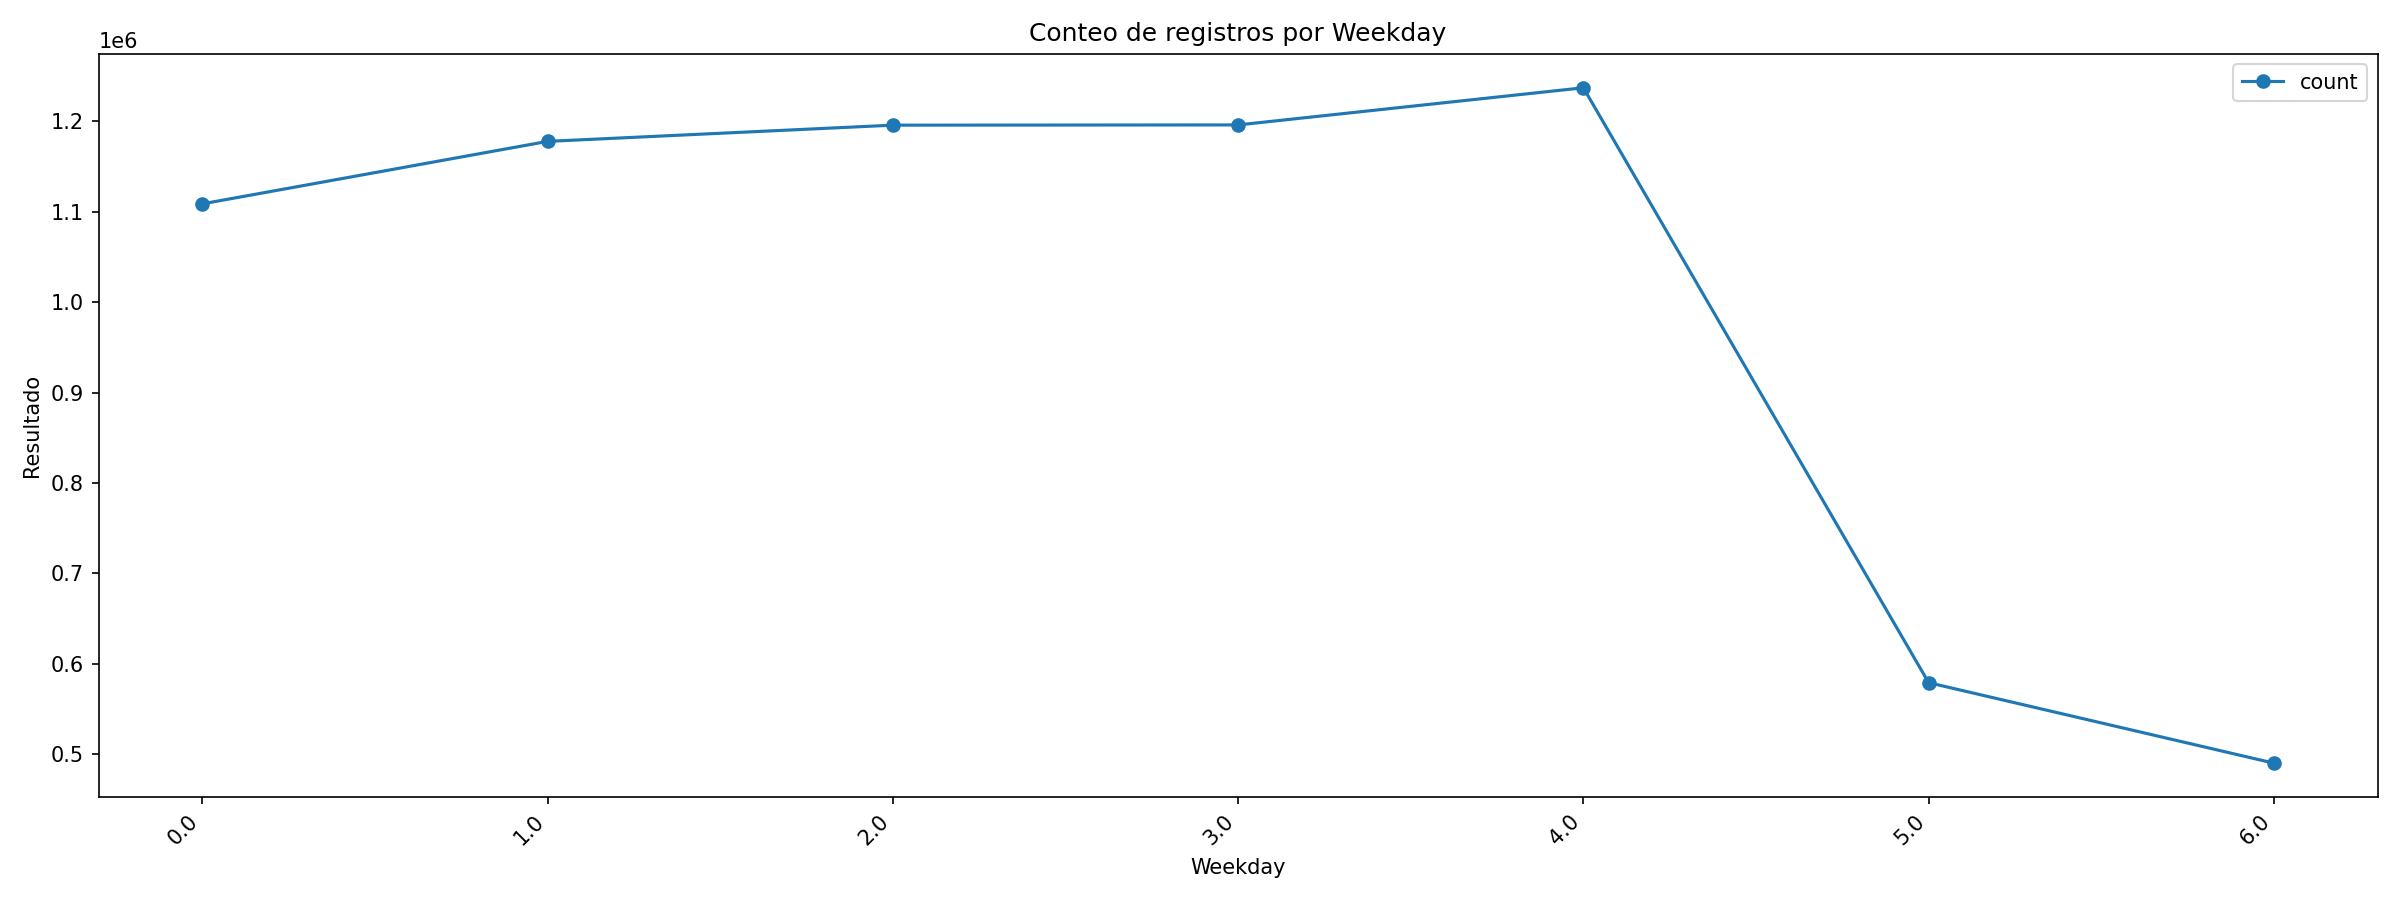

In [9]:
plot_from_api({
    "tipo": "Línea",
    "columna_x": "Weekday",
    "agrupacion_fecha": "Ninguna",
    "agregacion": "Conteo"
})

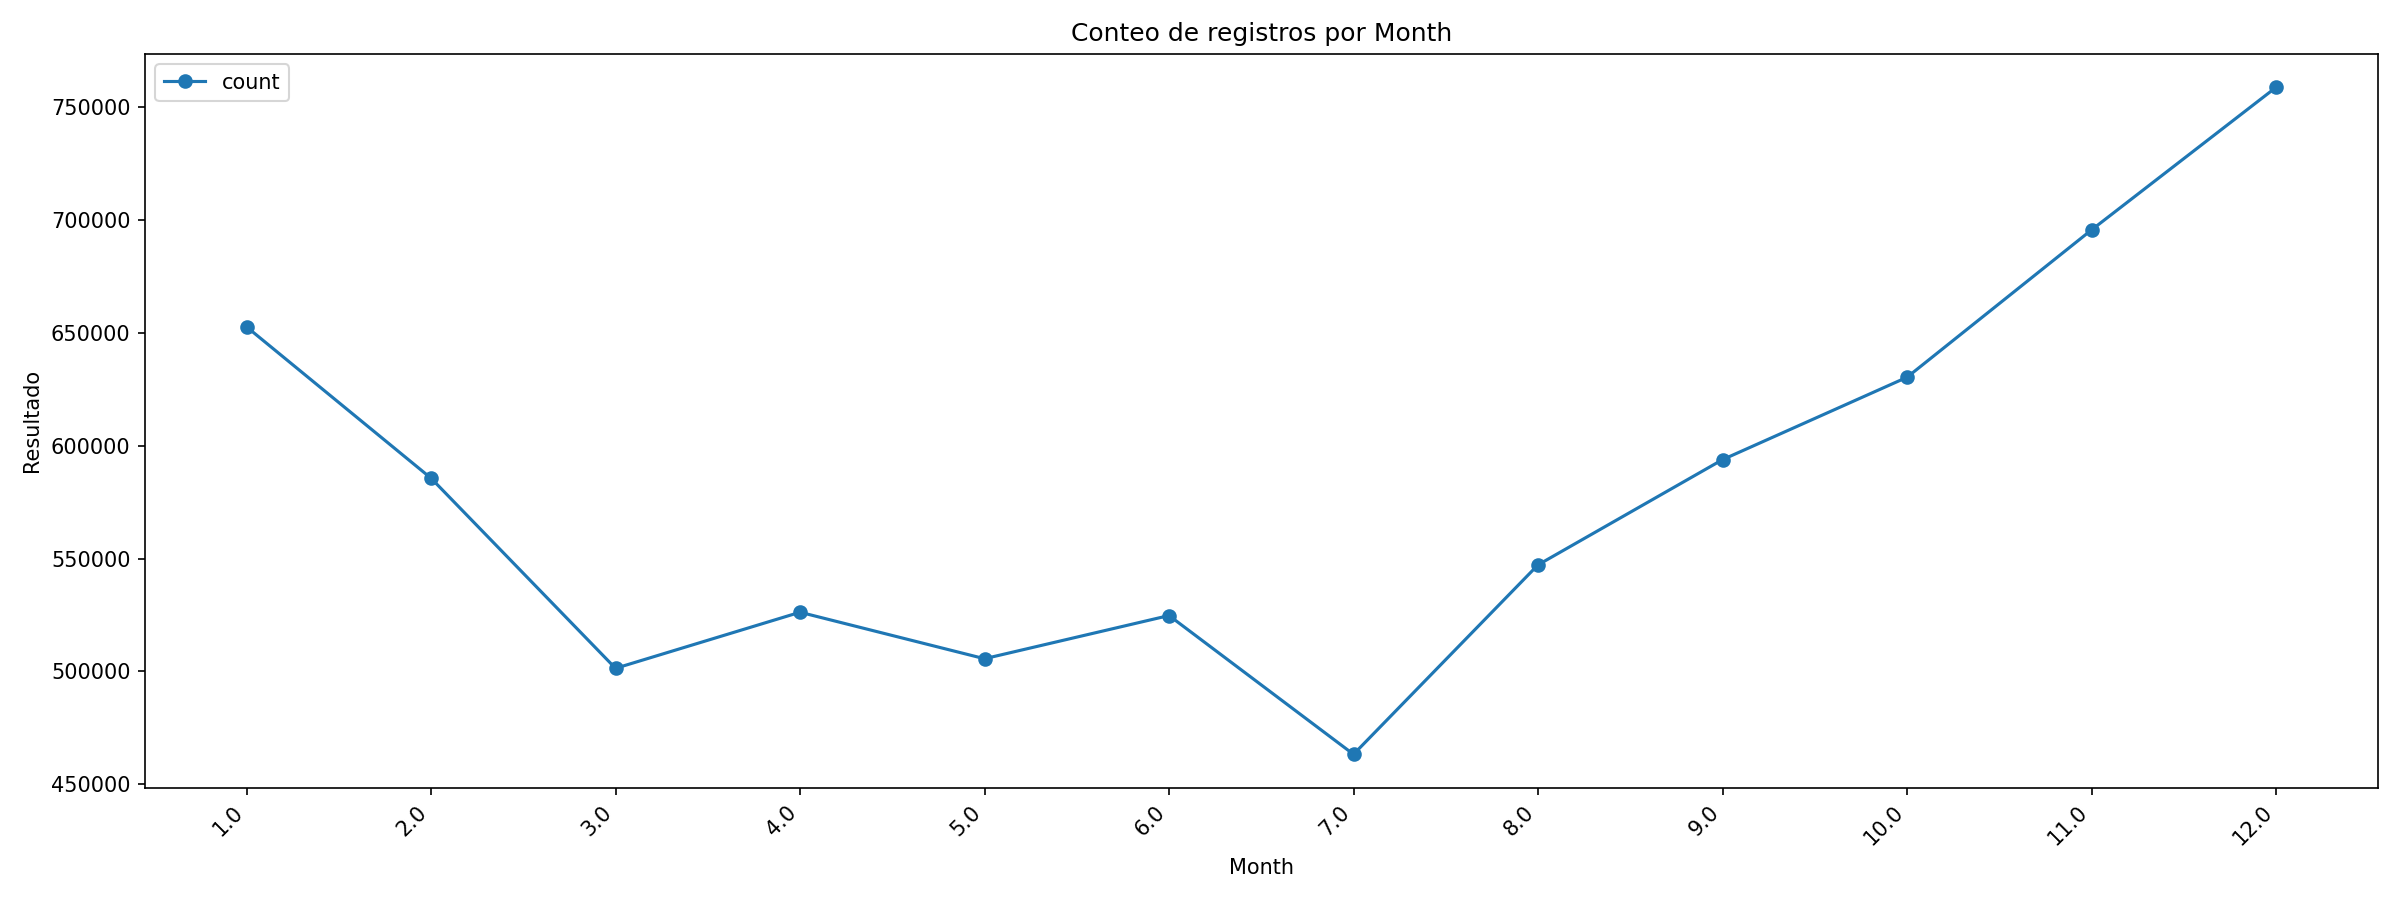

In [10]:
plot_from_api({
    "tipo": "Línea",
    "columna_x": "Month",
    "agrupacion_fecha": "Ninguna",
    "agregacion": "Conteo"
})

Top 10 estados: ['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR']


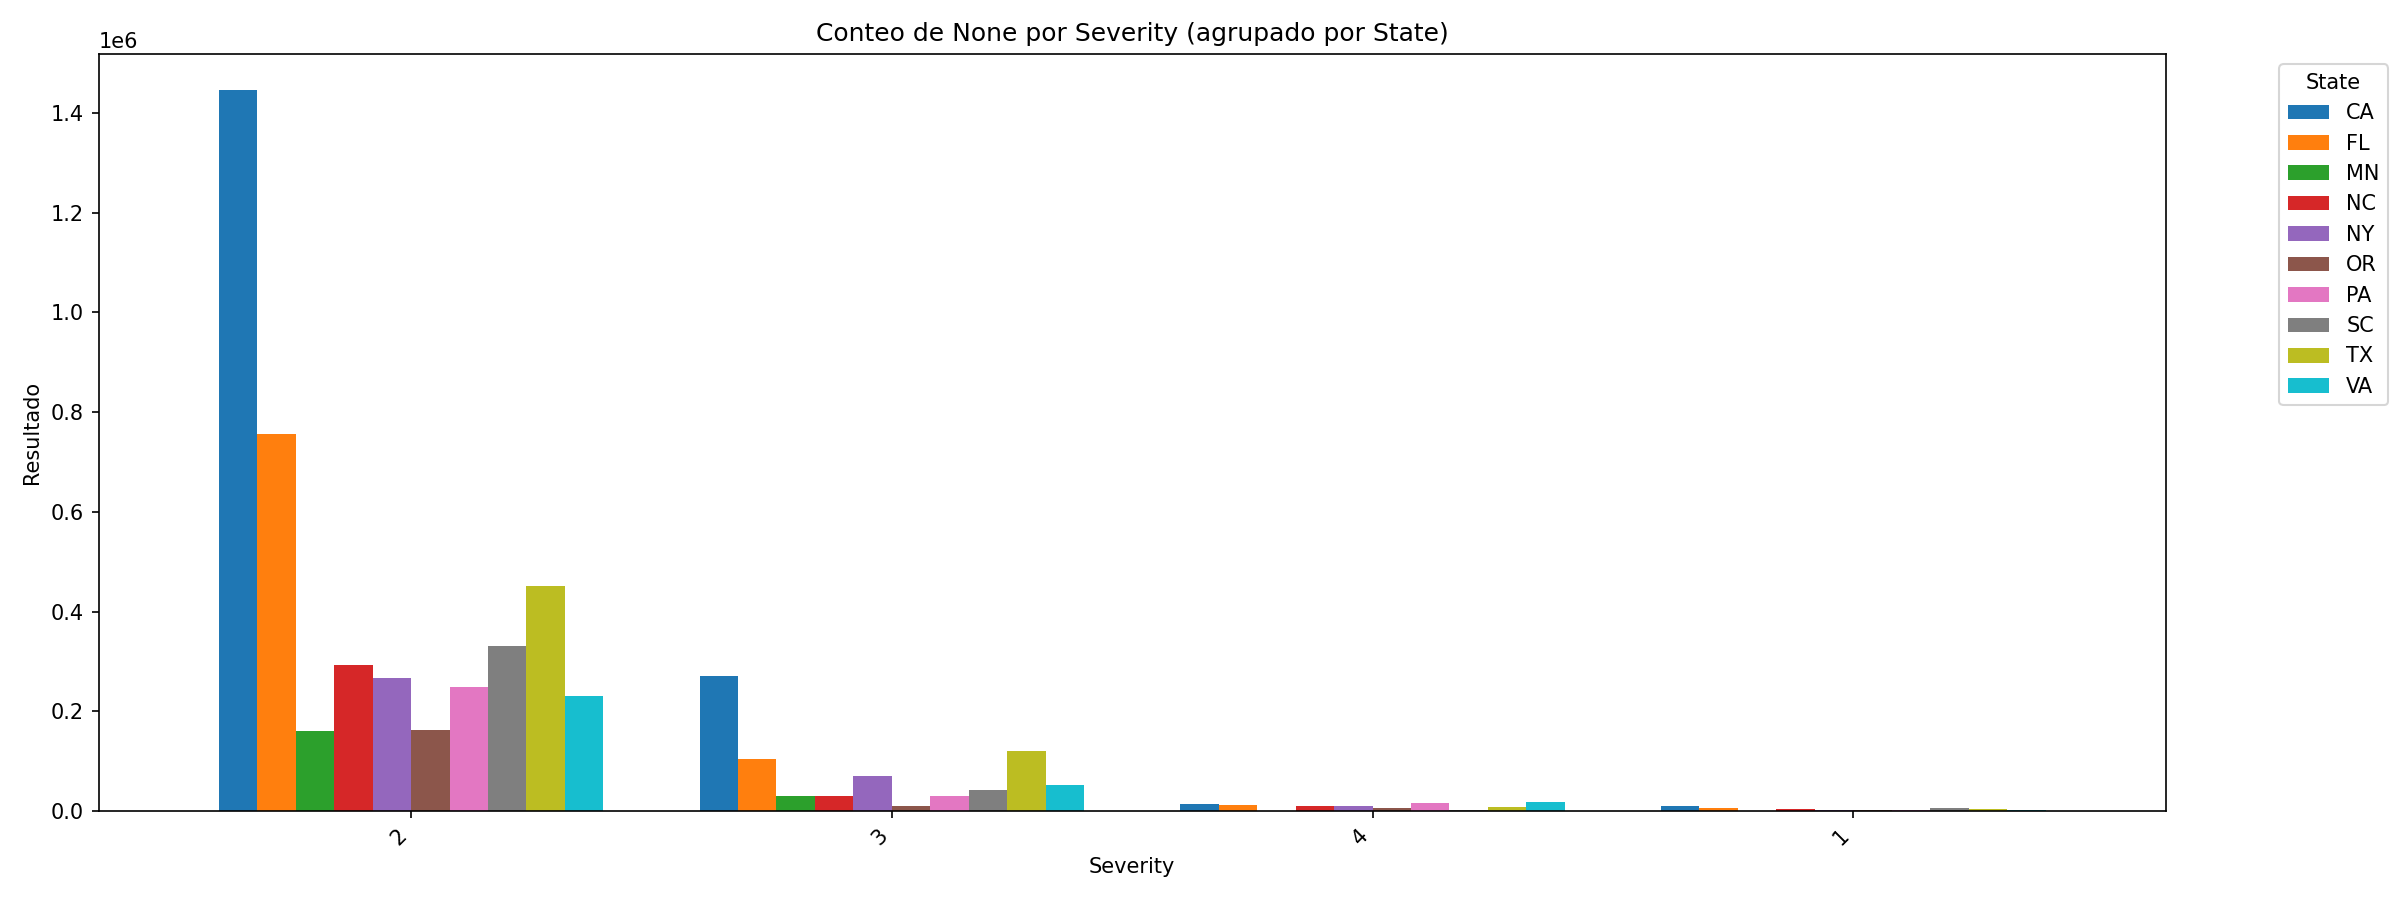

In [11]:
df_full = pd.read_csv(PATH, low_memory=False)

top_states = df_full["State"].value_counts().nlargest(10).index.tolist()
print("Top 10 estados:", top_states)

plot_from_api({
    "tipo": "Barra",
    "columna_x": "Severity",
    "agregacion": "Conteo",
    "grupo": "State",
    "seleccion_grupos": top_states
})



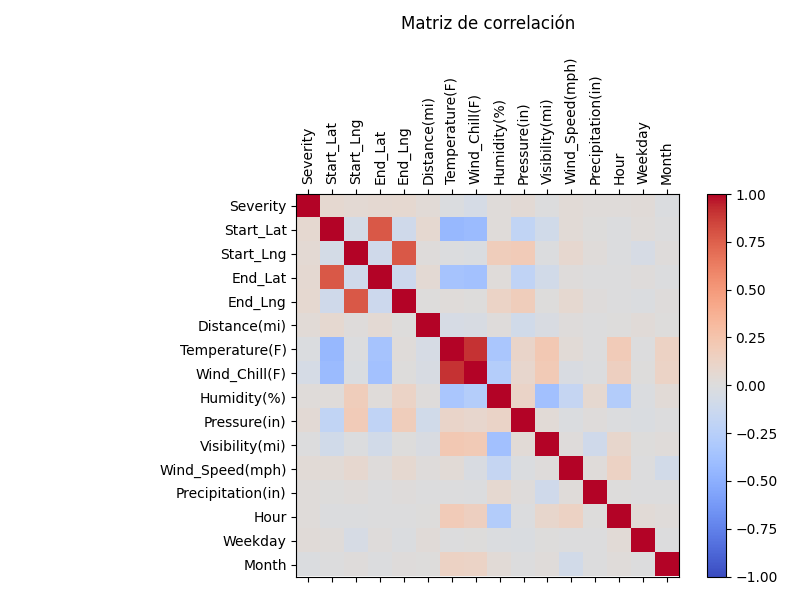

In [12]:
plot_from_api({
    "tipo": "Correlograma"
})

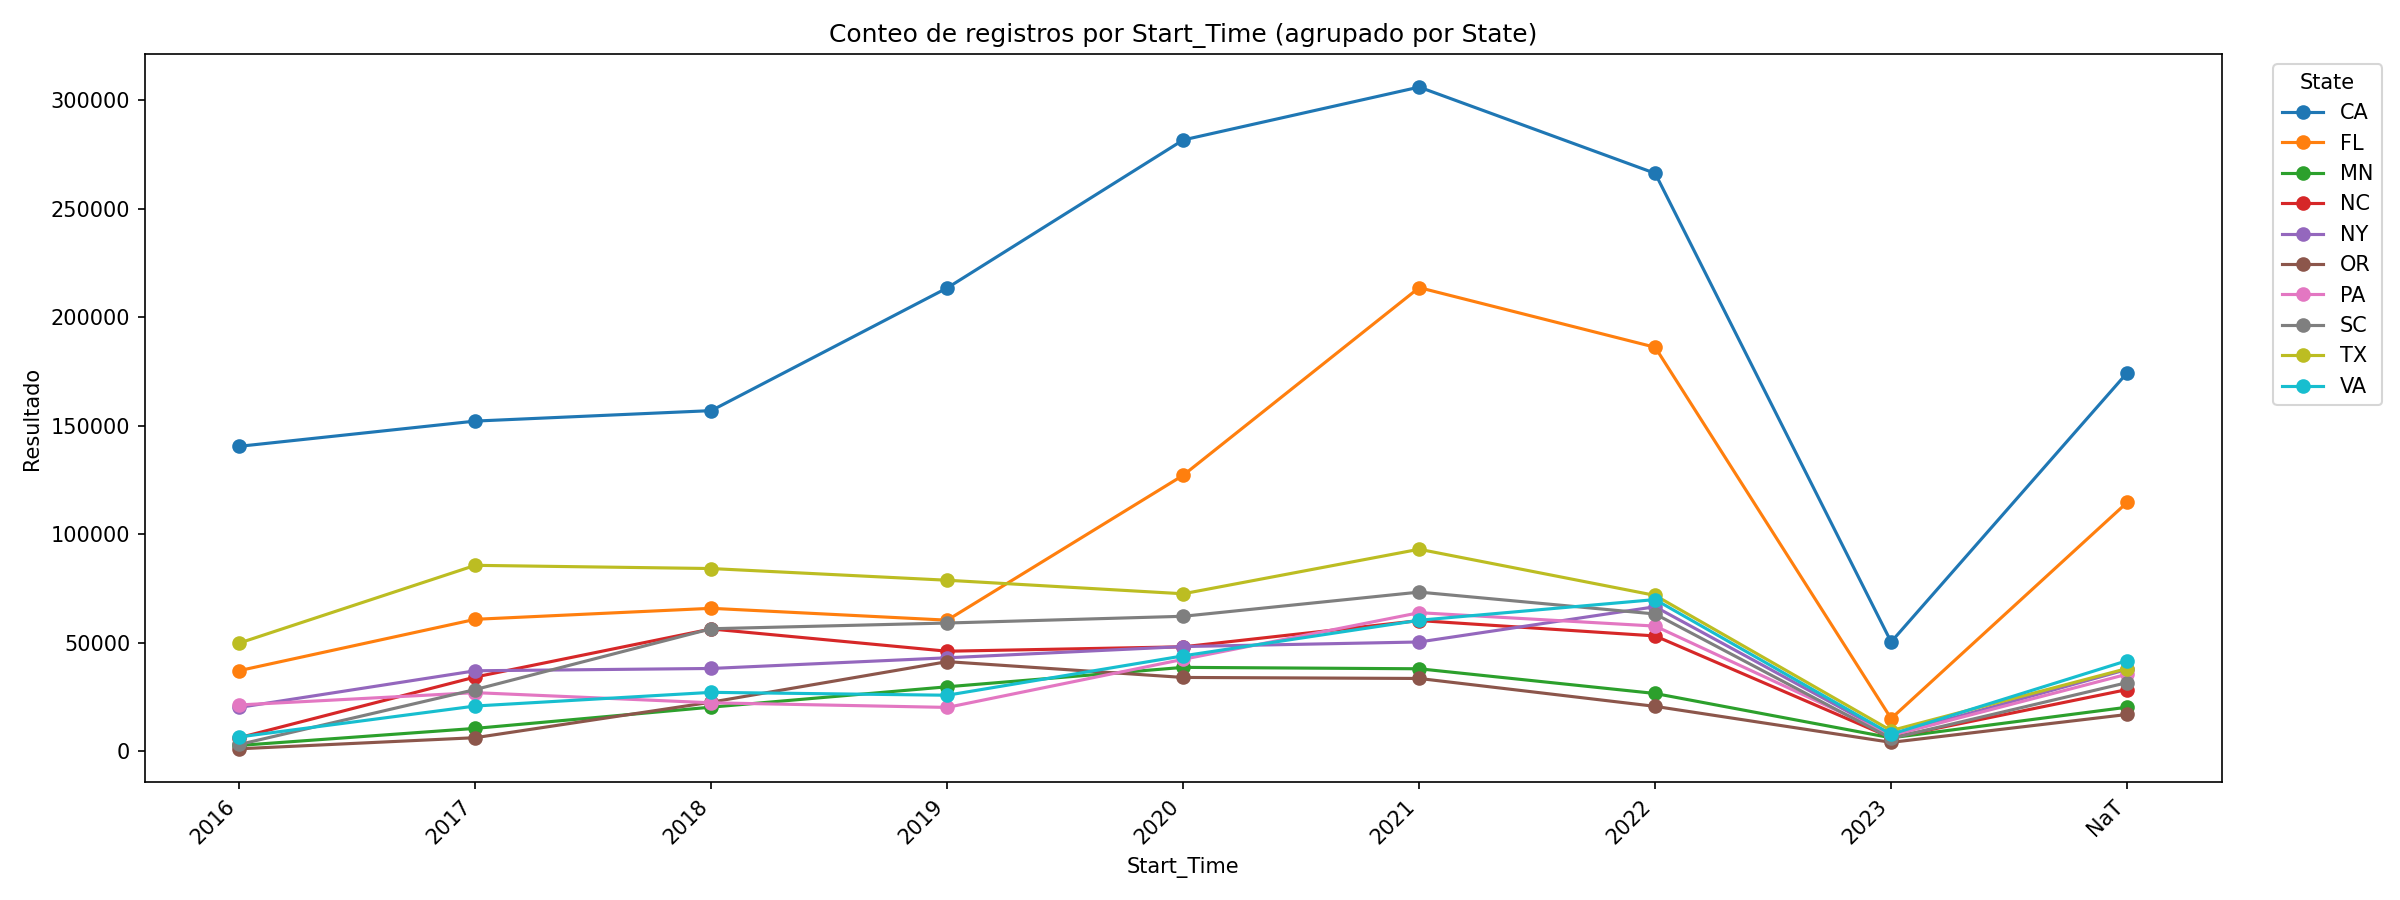

In [13]:
plot_from_api({
    "tipo": "Línea",
    "columna_x": "Start_Time",
    "agrupacion_fecha": "Anual",
    "agregacion": "Conteo",
    "grupo": "State",
    "seleccion_grupos": top_states
})



 - La serie de accidentes por hora permite identificar horas punta de siniestros.  

 - El correlograma destaca correlaciones (p.ej. entre visibilidad y precipitación) que podemos explotar como predictores en los modelos.



 en el correlograma se ve 


boxplot:

Rango: la humedad va prácticamente de 0 % hasta 100 %.

Mediana (~65 %): la línea central del rectángulo.

IQR (caja): desde ~50 % (Q1) hasta ~85 % (Q3), indicando que el 50 % de los accidentes se registran en ese intervalo.

Bigotes: llegan aproximadamente de 10 % a 100 % (no hay muchos valores por debajo de 10 %).

Outliers: se ven algunos puntos aislados bajos (<10 %) y altos (cercanos a 100 %), pero la mayoría de los datos caen dentro de los bigotes.

Conclusión: la humedad cubre casi todo el espectro, con concentración en valores moderados-altos (50–85 %). Hay pocos accidentes con humedad extremadamente baja, lo cual podría ser una señal para agrupar alturas de humedad en rangos discretos o para ver si esos outliers coinciden con condiciones meteorológicas particulares.

## 3. Modelado Supervisado: Clasificación de Gravedad

Objetivo: predecir si un accidente es grave (Severity ≥ 3) o leve (< 3), comparando tres algoritmos:

- k-Nearest Neighbors

- Árbol de Decisión

- Naive Bayes

Usaremos nuestros endpoints `/train_model` y `/evaluate_model` para entrenar y evaluar cada modelo vía el servidor.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1) Carga y muestreo
PATH = "datasets/US_Accidents_March23.csv"
df = pd.read_csv(PATH, low_memory=False)

# Opcional: reducir a 100k filas aleatorias para prototipado rápido
df = df.sample(n=100_000, random_state=42)

# 2) Ingeniería temporal
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Hour"]    = df["Start_Time"].dt.hour
df["Weekday"] = df["Start_Time"].dt.dayofweek
df["Month"]   = df["Start_Time"].dt.month

# 3) Selección y limpieza
numeric_cols = [
    "Distance(mi)", "Temperature(F)", "Humidity(%)",
    "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
    "Precipitation(in)", "Hour", "Weekday", "Month"
]
df = df[numeric_cols + ["Severity"]].dropna()

# 4) Target binario
df["SevHigh"] = (df["Severity"] >= 3).astype(int)

# 5) División estratificada
X = df[numeric_cols]
y = df["SevHigh"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 7) Modelos
models_clf = {
    "Naive Bayes":    GaussianNB(),
    "Decision Tree":  DecisionTreeClassifier(max_depth=5, random_state=42),
    "k-NN":           KNeighborsClassifier(n_neighbors=5)
}

# 8) CV+paralelizado
scoring = ["precision", "recall", "accuracy"]
results = {}
for name, model in models_clf.items():
    cv = cross_validate(
        model,
        X_train_scaled, y_train,
        cv=5,
        scoring=scoring,
        n_jobs=-1,                 # usa todos los núcleos
        return_train_score=False
    )
    results[name] = {
        "precision":   cv["test_precision"].mean(),
        "recall":      cv["test_recall"].mean(),
        "accuracy":    cv["test_accuracy"].mean(),
        "recall_std":  cv["test_recall"].std()
    }

# 9) Mostrar
df_results = pd.DataFrame(results).T
print(df_results)


               precision    recall  accuracy  recall_std
Naive Bayes     0.232707  0.056474  0.818622    0.012421
Decision Tree   0.452394  0.032272  0.838393    0.024211
k-NN            0.259199  0.069534  0.818436    0.005036


Accuracy: aciertos globales.

Precision: porcentaje de predicciones “grave” que realmente lo son.

Recall: porcentaje de accidentes graves detectados (clave si no queremos dejar casos graves fuera).

F1-score se puede añadir si tu endpoint lo soporta.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# 1) Ajusta la ruta al CSV
PATH = "datasets/US_Accidents_March23.csv"  # <- pon aquí la ruta correcta
df = pd.read_csv(PATH, low_memory=False)

# 2) Muestreo rápido de 100k filas
df_sample = df.sample(n=100_000, random_state=42)

# 3) Ingenieria de variables temporales
df_sample["Start_Time"] = pd.to_datetime(df_sample["Start_Time"], errors="coerce")
df_sample["Hour"]    = df_sample["Start_Time"].dt.hour
df_sample["Weekday"] = df_sample["Start_Time"].dt.dayofweek
df_sample["Month"]   = df_sample["Start_Time"].dt.month

# 4) Selección y limpieza de numéricas
numeric_cols = [
    "Distance(mi)", "Temperature(F)", "Humidity(%)",
    "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
    "Precipitation(in)", "Hour", "Weekday", "Month"
]
X = df_sample[numeric_cols].dropna()

# 5) Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Definición de algoritmos
cluster_models = {
    "KMeans (k=4)":           KMeans(n_clusters=4, random_state=42),
    "Agglomerative (k=4)":    AgglomerativeClustering(n_clusters=4),
    "DBSCAN (ε=0.5, min=10)":  DBSCAN(eps=0.5, min_samples=10)
}

# 7) Entrenamiento y cálculo de silhouette
results = []
for name, model in cluster_models.items():
    labels = model.fit_predict(X_scaled)
    # número de clusters (excluyendo ruido en DBSCAN)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    # calcula silhouette solo donde hay al menos 2 clusters
    if n_clusters > 1:
        mask = labels != -1
        sil = silhouette_score(X_scaled[mask], labels[mask])
    else:
        sil = None
    results.append({
        "Algoritmo":  name,
        "Clusters":   n_clusters,
        "Silhouette": sil
    })

# 8) Mostramos resultados
df_clust = pd.DataFrame(results)
print(df_clust)



                Algoritmo  Clusters  Silhouette
0            KMeans (k=4)         4    0.145529
1     Agglomerative (k=4)         4    0.205806
2  DBSCAN (ε=0.5, min=10)       103   -0.132325


In [4]:
centroids = pd.DataFrame(X_scaled).groupby(labels).mean()
centroids.columns = numeric_cols
print(centroids)

      Distance(mi)  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
-1        0.026646       -0.077320    -0.005435     -0.033842       -0.036231   
 0       -0.273165        1.173575    -0.365455      0.358321        0.396421   
 1       -0.286960        1.159135    -0.079422      0.328900        0.393021   
 2       -0.274831        1.227832    -0.350862      0.330046        0.395140   
 3       -0.286706        1.062859    -0.011171      0.369558        0.393425   
...            ...             ...          ...           ...             ...   
 98      -0.327822        1.144226    -1.058200      0.424945        0.396421   
 99      -0.278181        0.046370    -0.231548      0.641434        0.396421   
 100     -0.265590        1.313271     0.047653      0.608204        0.396421   
 101     -0.271474        0.793613    -0.550895     -0.193046        0.396421   
 102     -0.325225        0.769509     0.441818      0.511310        0.396421   

      Wind_Speed(mph)  Prec